### Changes in Data Preprocessing for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)

In [3]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
for col in application_df:
    print(application_df[col].unique())

['T10' 'T3' 'T5' 'T7' 'T4' 'T6' 'T2' 'T9' 'T19' 'T8' 'T13' 'T12' 'T29'
 'T25' 'T14' 'T17' 'T15']
['Independent' 'CompanySponsored' 'Family/Parent' 'National' 'Regional'
 'Other']
['C1000' 'C2000' 'C3000' 'C1200' 'C2700' 'C7000' 'C7200' 'C1700' 'C4000'
 'C7100' 'C2800' 'C6000' 'C2100' 'C1238' 'C5000' 'C7120' 'C1800' 'C4100'
 'C1400' 'C1270' 'C2300' 'C8200' 'C1500' 'C7210' 'C1300' 'C1230' 'C1280'
 'C1240' 'C2710' 'C2561' 'C1250' 'C8000' 'C1245' 'C1260' 'C1235' 'C1720'
 'C1257' 'C4500' 'C2400' 'C8210' 'C1600' 'C1278' 'C1237' 'C4120' 'C2170'
 'C1728' 'C1732' 'C2380' 'C1283' 'C1570' 'C2500' 'C1267' 'C3700' 'C1580'
 'C2570' 'C1256' 'C1236' 'C1234' 'C1246' 'C2190' 'C4200' 'C0' 'C3200'
 'C5200' 'C1370' 'C2600' 'C1248' 'C6100' 'C1820' 'C1900' 'C2150']
['ProductDev' 'Preservation' 'Heathcare' 'CommunityServ' 'Other']
['Association' 'Co-operative' 'Trust' 'Corporation']
[1 0]
['0' '1-9999' '10000-24999' '100000-499999' '10M-50M' '25000-99999' '50M+'
 '1M-5M' '5M-10M']
['N' 'Y']
[    5000   108590

In [5]:
application_df.groupby(["USE_CASE"]).count()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
USE_CASE,,,,,,,,,
CommunityServ,384,384,384,384,384,384,384,384,384
Heathcare,146,146,146,146,146,146,146,146,146
Other,3,3,3,3,3,3,3,3,3
Preservation,28095,28095,28095,28095,28095,28095,28095,28095,28095
ProductDev,5671,5671,5671,5671,5671,5671,5671,5671,5671


In [6]:
application_df.groupby(["SPECIAL_CONSIDERATIONS"]).count()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
SPECIAL_CONSIDERATIONS,,,,,,,,,
N,34272,34272,34272,34272,34272,34272,34272,34272,34272
Y,27,27,27,27,27,27,27,27,27


In [7]:
application_df.groupby(["ORGANIZATION"]).count()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
ORGANIZATION,,,,,,,,,
Association,10255,10255,10255,10255,10255,10255,10255,10255,10255
Co-operative,486,486,486,486,486,486,486,486,486
Corporation,43,43,43,43,43,43,43,43,43
Trust,23515,23515,23515,23515,23515,23515,23515,23515,23515


In [8]:
application_df.groupby(["STATUS"]).count()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
STATUS,,,,,,,,,
0,5,5,5,5,5,5,5,5,5
1,34294,34294,34294,34294,34294,34294,34294,34294,34294


### Remove Special Considerations and Status column and reduce bins of USE_CASE and Organizations and maintain bins for Application counts and classification counts

In [9]:
application_df = application_df.drop(["SPECIAL_CONSIDERATIONS", "STATUS"], 1)

In [10]:
application_df.isna().sum()

APPLICATION_TYPE    0
AFFILIATION         0
CLASSIFICATION      0
USE_CASE            0
ORGANIZATION        0
INCOME_AMT          0
ASK_AMT             0
IS_SUCCESSFUL       0
dtype: int64

In [11]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [12]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

In [13]:
# Look at APPLICATION_TYPE value counts for binning
Application_type_counts = application_df.APPLICATION_TYPE.value_counts()
Application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

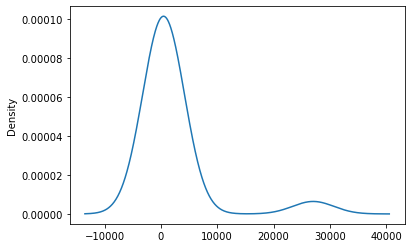

In [14]:
# Visualize the value counts of APPLICATION_TYPE
Application_type_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than ...?
replace_application = list(Application_type_counts[Application_type_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [16]:
#Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1236        1
C2150        1
C1248        1
C1245        1
C4500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C2400        6
C4100        6
C1720        6
C1600        5
C1257        5
C0           3
C2710        3
C1260        3
C1267        2
C1246        2
C1234        2
C3200        2
C1256        2
C1900        1
C4120        1
C2600        1
C4200        1
C1580        1
C2380        1
C3700        1
C1283        1
C2170        1
C5200        1
C1732        1
C2570        1
C1570        1
C1370        1
C6100        1
C2561        1
C8210        1
C1728        1
C1820        1
C2190        1
C2500        1
C1236     

<AxesSubplot:ylabel='Density'>

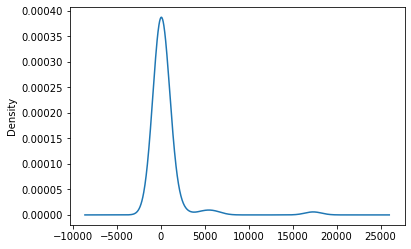

In [18]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [19]:
#Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [20]:
# Look at Use cases value counts for binning
use_case_counts = application_df.USE_CASE.value_counts()
use_case_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

<AxesSubplot:ylabel='Density'>

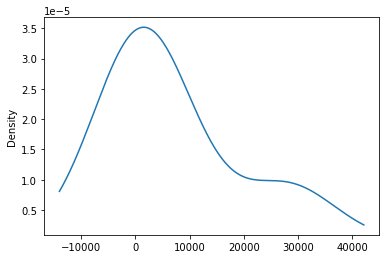

In [21]:
# Visualize the value counts of Use cases
use_case_counts.plot.density()

In [22]:
# Determine which values to replace if counts are less than ..?
replace_use_cases= list(use_case_counts[use_case_counts < 300].index)

# Replace in dataframe
for cls in replace_use_cases:
    application_df.USE_CASE = application_df.USE_CASE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Other              149
Name: USE_CASE, dtype: int64

In [23]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE    10
AFFILIATION          6
CLASSIFICATION       8
USE_CASE             4
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

In [24]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

In [25]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
application_df.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Other', 'USE_CASE_Preservation',
       'USE_CASE_ProductDev', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',


In [28]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [29]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Optimization: Attempt 1: Reduction in neurons in hidden layers and reduced to 50 epochs

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layers1 = 8
hidden_nodes_layers2 = 5

nn = tf.keras.models.Sequential()

#First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layers1, input_dim=number_input_features, activation= "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, activation="relu"))

#Output later
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 344       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 395
Trainable params: 395
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 617us/step - loss: 0.6653 - accuracy: 0.6360
Epoch 2/50
804/804 [==============================] - 0s 601us/step - loss: 0.5869 - accuracy: 0.7233
Epoch 3/50
804/804 [==============================] - 0s 587us/step - loss: 0.5748 - accuracy: 0.7290
Epoch 4/50
804/804 [==============================] - 0s 616us/step - loss: 0.5725 - accuracy: 0.7278
Epoch 5/50
804/804 [==============================] - 1s 626us/step - loss: 0.5739 - accuracy: 0.7240
Epoch 6/50
804/804 [==============================] - 0s 596us/step - loss: 0.5689 - accuracy: 0.7291
Epoch 7/50
804/804 [==============================] - 0s 611us/step - loss: 0.5641 - accuracy: 0.7358
Epoch 8/50
804/804 [==============================] - 0s 595us/step - loss: 0.5708 - accuracy: 0.7289
Epoch 9/50
804/804 [==============================] - 1s 716us/step - loss: 0.5671 - accuracy: 0.7298
Epoch 10/50
804/804 [==============================] - 0s 617us/step - loss: 0.567

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5658 - accuracy: 0.7209
Loss: 0.5657929182052612, Accuracy: 0.7209329605102539


<AxesSubplot:>

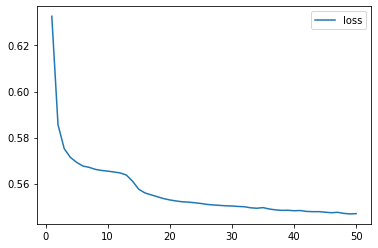

In [33]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

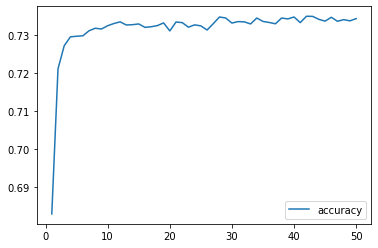

In [34]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [35]:
#nn = tf.keras.backend.clear_session()